#Sociology of the Digital Public Space - Group Research - DATA ANALYSIS BRUT

# Import

##Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import json
from datetime import datetime, timedelta, date
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Functions

In [ ]:
# Functions ----> Dataviz

def boxplot_hash(targeted_hashtags:list, data, dates:list):
  dict_tweets_month = {}
  for hash in targeted_hashtags:
    dict_tweets_month[hash] = [0 for i in range(len(dates))]

  for i in data.index:
    all_hashtags = list(data['hashtags'])[i]

    for hash in targeted_hashtags:

      if hash[1:] in all_hashtags:
        date_position = dates.index(df['local_time'][i][:7])
        dict_tweets_month[hash][date_position] += 1

  df_hash = pd.DataFrame(dict_tweets_month, index=dates)
  return df_hash

def most_active_user(df):
  """Return from an original dataset of tweets all users and the number of tweets they have published"""
  all_users = list(df['user_screen_name'].unique())
  top_user = { 'total': []}
  index = []

  for user in all_users:
    index.append(user)
    top_user['total'].append(len(df[df['user_screen_name'] == user]))

  new_df = pd.DataFrame(top_user, index=index).sort_values(by=['total'], ascending=[False])

  return new_df



def boxplot_user(targeted_users:list, data, dates:list):
  dict_tweets_month = {}
  for user in targeted_users:
    dict_tweets_month[user] = [0 for i in range(len(dates))]
    data2 = data[data['user_screen_name'] == user]

    for i in data2.index:
      date_position = dates.index(data2['local_time'][i][:7])
      dict_tweets_month[user][date_position] += 1

  df_top_user = pd.DataFrame(dict_tweets_month, index=dates)
  return df_top_user

def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


def boxplot_hash(targeted_hashtags:list, df):

  def date(nb):
    return str(datetime.fromtimestamp(nb))

  #per second
  df = dataset[['timestamp_utc', 'hashtags']].copy()
  df['local_time'] = df['timestamp_utc'].apply(date)
  df = df.drop('timestamp_utc', axis=1)
  for hash in targeted_hashtags:
    modif_hash = "\'" + hash[1:] + "\'"
    df[hash] = df['hashtags'].str.contains(modif_hash).map({True: 1, False: 0})
  df_hash_sec = df.groupby('local_time', as_index=False).sum()

  #daily

  df_hash_daily =  df_hash_sec.copy()
  df_hash_daily['date'] = df_hash_sec['local_time'].str.split(pat=" ").str.get(0)
  df_hash_daily =  df_hash_daily.groupby('date', as_index=False).sum()

  #monthly
  df_hash_monthly =  df_hash_sec.copy()
  df_hash_monthly['date'] = df_hash_monthly['local_time'].str.split(pat="-").str.get(0) + pd.Series('-', index=range(len(df_hash_sec))) + df_hash_monthly['local_time'].str.split(pat="-").str.get(1)
  df_hash_monthly = df_hash_monthly.groupby('date', as_index=False).sum()

  return df_hash_sec, df_hash_daily, df_hash_monthly

def active_user_monthly(dataset, top:int):
  """Create the dataset which select, for the top {top} most active users (that's to say those who published
  the most during the entire dataset period), the number of published tweets by month"""

  #dataset by second
  df = dataset[['user_screen_name', 'local_time']].copy()
  targeted_users = list(dataset['user_screen_name'].value_counts().index)[:top]

  for user in targeted_users:
    df[user] = df['user_screen_name'].str.contains(user).map({True: 1, False: 0}) #count the number of tweets corresponding to the targated user
  df_user_sec = df.groupby('local_time', as_index=False).sum() #sum the number of tweets by merging by users

  #dataset by month
  df_user_monthly =  df_user_sec.copy()
  df_user_monthly['date'] = df_user_monthly['local_time'].str.split(pat="-").str.get(0) + pd.Series('-', index=range(len(df_hash_sec))) + df_user_monthly['local_time'].str.split(pat="-").str.get(1)
  df_user_monthly = df_user_monthly.groupby('date', as_index=False).sum()

  return df_user_monthly


def boxplot_user(targeted_hashtags:list, df):

  def date(nb):
      return str(datetime.fromtimestamp(nb))

  df = df_user[['timestamp_utc', 'hashtags', 'retweet_count', 'like_count', 'reply_count']].copy()
  df['local_time'] = df['timestamp_utc'].apply(date)
  df = df.drop('timestamp_utc', axis=1)
  for hash in targeted_hashtags:
      modif_hash = "\'" + hash[1:] + "\'"
      df[hash] = df['hashtags'].str.contains(modif_hash).map({True: 1, False: 0})
  df_user_sec = df.groupby('local_time', as_index=False).sum()

  #daily
  df_user_daily =  df_user_sec.copy()
  df_user_daily['date'] = df_user_sec['local_time'].str.split(pat=" ").str.get(0)
  df_user_daily =  df_user_daily.groupby('date', as_index=False).sum()

  #monthly
  df_user_monthly =  df_user_sec.copy()
  df_user_monthly['date'] = df_user_monthly['local_time'].str.split(pat="-").str.get(0) + pd.Series('-', index=range(len(df_user_sec))) + df_user_monthly['local_time'].str.split(pat="-").str.get(1)
  df_user_monthly = df_user_monthly.groupby('date', as_index=False).sum()

  return df_user_sec, df_user_daily, df_user_monthly

def basic_info(df_user, hashtag_list):

  print('-------- BASIC INFORMATIONS ------------')
  print(f'==> Name: {df_user.user_screen_name.iloc[0]}, aka {df_user.user_name.iloc[0]}')
  print(f'==> Description: {df_user.user_description.iloc[0]}')
  print(f'==> Location: {df_user.user_location.iloc[0]}')
  print('')
  print(f'==> Number of followers: {int(df_user.user_followers.iloc[0])}')
  print(f'==> Number of following: {int(df_user.user_friends.iloc[0])}')
  print('----------------------------------------')

  df_user_sec, df_user_daily, df_user_monthly = boxplot_user(targeted_hashtags=hashtag_list, df=df_user)

  #hash
  col = hashtag_list + ['date']
  df = df_user_monthly[col].set_index('date')
  ax = df.plot.bar(stacked=True, figsize=(10,7))
  plt.title(f"Number of possible antisemitic tweets hashtags per month for {name}")

  #influence by month
  col = ['date', 'retweet_count', 'like_count', 'reply_count']
  df = df_user_monthly[col].set_index('date')
  ax = df.plot.bar(stacked=False, figsize=(10,7))
  plt.title(f"Metrics about {name}'s influence, by month")

  #influence by day
  col = ['date', 'retweet_count', 'like_count', 'reply_count']
  df = df_user_daily[col].set_index('date')
  ax = df.plot(stacked=False, figsize=(10,7))
  plt.title(f"Metrics about {name}'s influence, by day")
  plt.grid()

# Data Merging
The data scraping allows to save all the tweets whose hashatags belong to a targeted list **from 27/10/2021 to 27/10/2023**. The code below is merging all datasets of tweets in a single file called `FINAL_tweet`


In [ ]:
file_names =[
    #'after_attack_19112013',
    'before_attack_20112023',
    'before_Musk_23112023'
]

final_name = 'FINAL_tweet'

In [ ]:
col = ['id','local_time','timestamp_utc','text','url','quoted_id','quoted_user','quoted_user_id','quoted_timestamp_utc','retweeted_id','retweeted_user','retweeted_user_id','retweeted_timestamp_utc','media_files','media_types','media_urls','media_alt_texts','links','links_to_resolve','domains','hashtags','mentioned_ids','mentioned_names','collection_time','match_query','collected_via','coordinates','to_tweetid','to_username','to_userid','lang','possibly_sensitive','retweet_count','like_count','reply_count','user_screen_name','user_name','user_friends','user_followers','user_location','user_verified','user_description','user_created_at','user_id','user_tweets','user_likes','user_lists','user_image','user_timestamp_utc','source_url','source_name','user_url']

dataset = pd.DataFrame()
shit_list = [] # dates didn't scraped because process too long
for name in file_names:

  # Merge datasets
  path = '//content/drive/Shareddrives/Group 3 - Sociology of Digital Public Spaces /Data/' + name + '.csv'

  new_df = pd.read_csv(path)
  dataset = pd.concat([new_df , dataset], axis=0)
  dataset = dataset.sort_values(by=['timestamp_utc']).reset_index(drop=True)
  dataset= dataset.drop_duplicates(subset=['url'])
  dataset = dataset[col]

  # Merge the list of unscraped dates
  json_path = '//content/drive/Shareddrives/Group 3 - Sociology of Digital Public Spaces /Data/' + name + '.json'
  with open(json_path) as user_file:
    file_contents = user_file.read()
    dict_info = json.loads(file_contents)
    shit_list += dict_info['shit_date']

dataset.to_csv(
       '//content/drive/Shareddrives/Group 3 - Sociology of Digital Public Spaces /Data/Data Analysis/' + final_name + '.csv',
      index=False
  )

# several stats
end, begin = dataset['local_time'].to_list()[-1], dataset['local_time'].to_list()[0]
end_utc, begin_utc = dataset['timestamp_utc'].to_list()[-1], dataset['timestamp_utc'].to_list()[0]
print('The final datset is composed of the following caracteristics')
print(f'== Number of Tweets   => {len(dataset)}')
print(f'== Tweets period from => {begin} to {end}')
print(f'== Number of days unscrapped => {int(len(shit_list)/3600/24)} => {round(len(shit_list)/(end_utc - begin_utc),2)}% of unscraped dates')

<ipython-input-5-2f0950cebcdd>:10: DtypeWarning: Columns (18,24,26,40,52,53,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv(path)


The final datset is composed of the following caracteristics
== Number of Tweets   => 230905
== Tweets period from => 2022-07-23T20:13:18 to 2023-09-30T23:54:14
== Number of days unscrapped => 8 => 0.02% of unscraped dates


# Data Description: Entire Dataset

In [ ]:
path1 = '//content/drive/Shareddrives/Group 3 - Sociology of Digital Public Spaces /Data/FINAL_tweet.csv'
dataset = pd.read_csv(path1)

<ipython-input-6-f638f7bca22f>:2: DtypeWarning: Columns (18,24,26,40) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(path1)


In [ ]:
%%capture
hashtag_list = ['#rotschild','#soros','#zionist','#thejew','#jews','#jew','#jewishracialsupremacism',
                '#unbonjuif','#yeisright','#ye24','#jewishprivilege','#killtheJews','#hitlerwasright',
                '#bantheadl','#exposethenose','#jewishsupremacy','#zionistjews','#zionismnazism'
]

df_hash_sec, df_hash_daily, df_hash_monthly =  boxplot_hash(
    targeted_hashtags=hashtag_list,
    df=dataset
)

## Overview

In [ ]:
#Basic stats
print('---- GENERAL STATISTICS ----')
print(f'== Number of Tweets   => {len(dataset)}')
print(f'== Number of retweets => {int(dataset.retweet_count.sum())}')
print(f'== Number of users    => {len(dataset.user_id.unique())}')
print(f'== Tweets period from => {dataset.local_time[0]} to {dataset.local_time[len(dataset) - 1]}')
print('')
print(f'== Number of languages => {len(dataset.lang.unique())}')
print('')
print(f'== Number of Non sensitive tweets=> {dataset.possibly_sensitive.value_counts()[0]}')
print(f'== Number of sensitive tweets    => {dataset.possibly_sensitive.value_counts()[1]}')
print(f'== Number of unflagged tweets    => {dataset.possibly_sensitive.isna().value_counts()[0]}')

---- GENERAL STATISTICS ----
== Number of Tweets   => 230905
== Number of retweets => 671531
== Number of users    => 59825
== Tweets period from => 2022-07-23T20:13:18 to 2023-09-30T23:54:14

== Number of languages => 59

== Number of Non sensitive tweets=> 89656
== Number of sensitive tweets    => 975
== Number of unflagged tweets    => 140274


## Hashtags

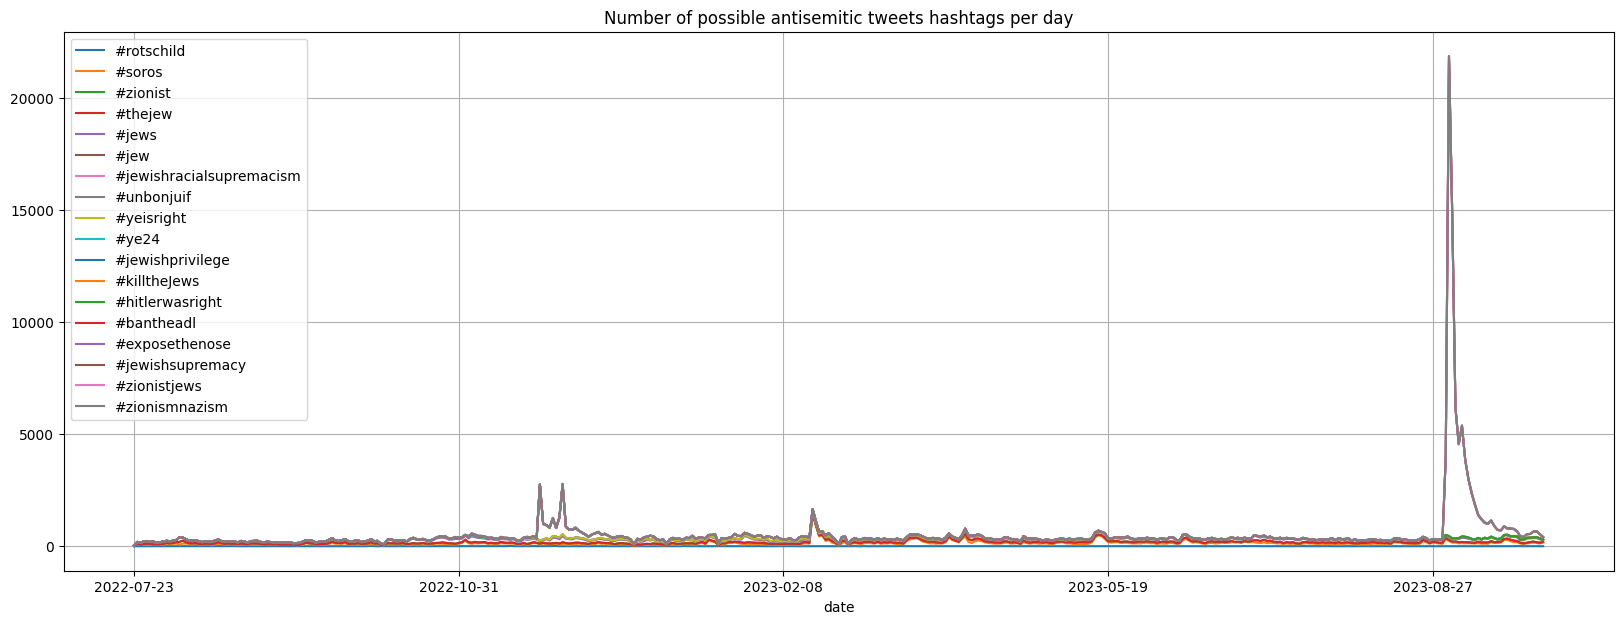

In [ ]:
#ax = df_hash.plot.bar(rot=0)
df = df_hash_daily.set_index('date')
ax = df.plot(stacked=True, figsize=(20,7))
plt.title("Number of possible antisemitic tweets hashtags per day")
plt.grid()

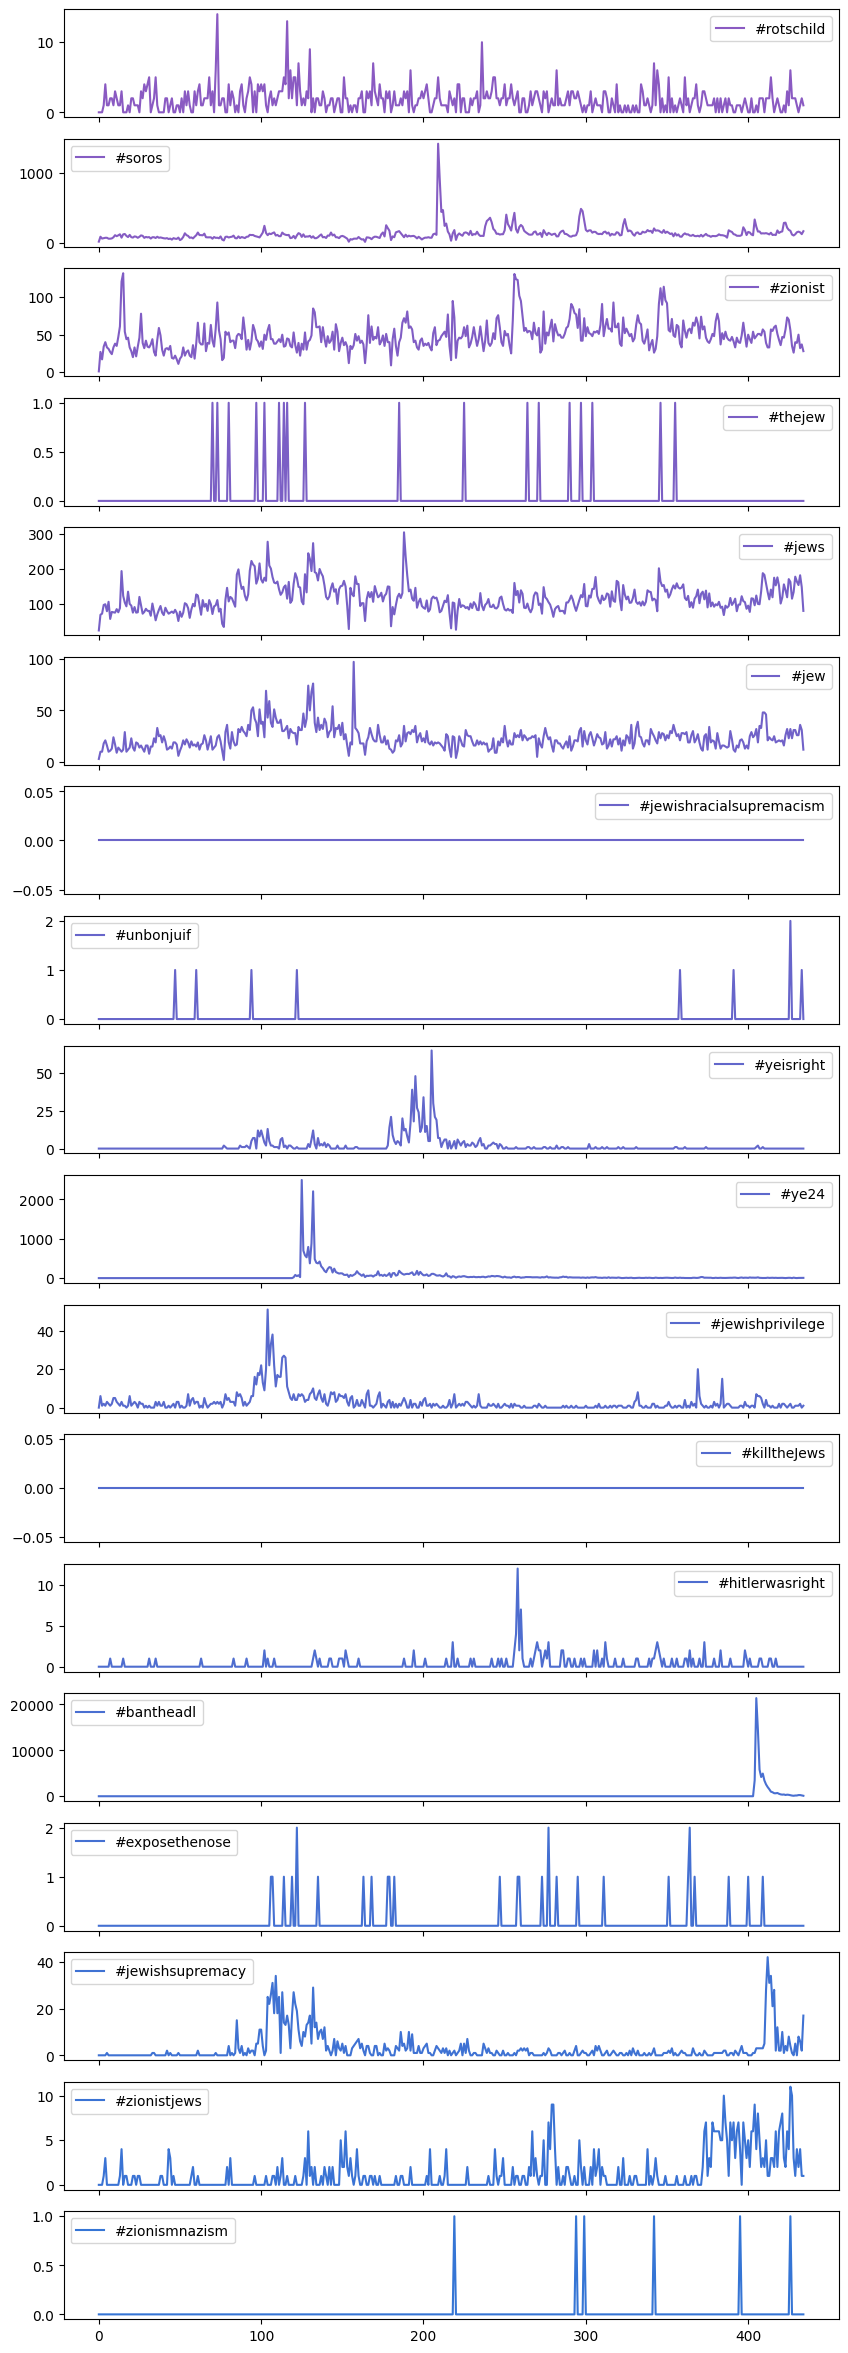

In [ ]:
color1, color2 = "#8A5AC2", "#3575D5"
axes = df_hash_daily.plot(rot=0, subplots=True, figsize=(10,30), color=get_color_gradient(color1, color2, 18))
axes[1].legend(loc=2)

Text(0.5, 1.0, 'Number of possible antisemitic tweets hashtags per month')

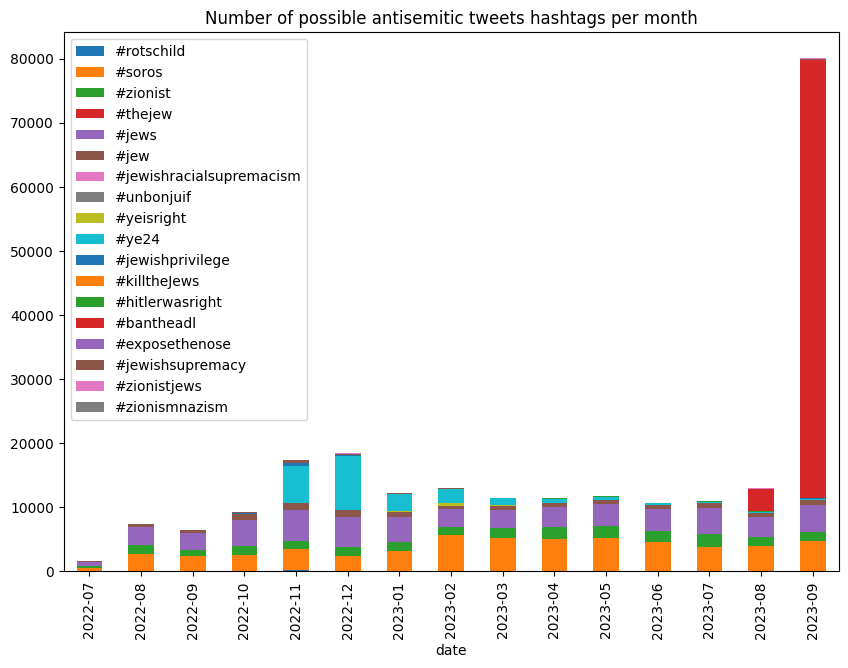

In [ ]:
# Targeted Monthly
df = df_hash_monthly.set_index('date')

color1 = "#8A5AC2"
color2 = "#3575D5"
ax = df.plot.bar(stacked=True, figsize=(10,7))
plt.title("Number of possible antisemitic tweets hashtags per month")

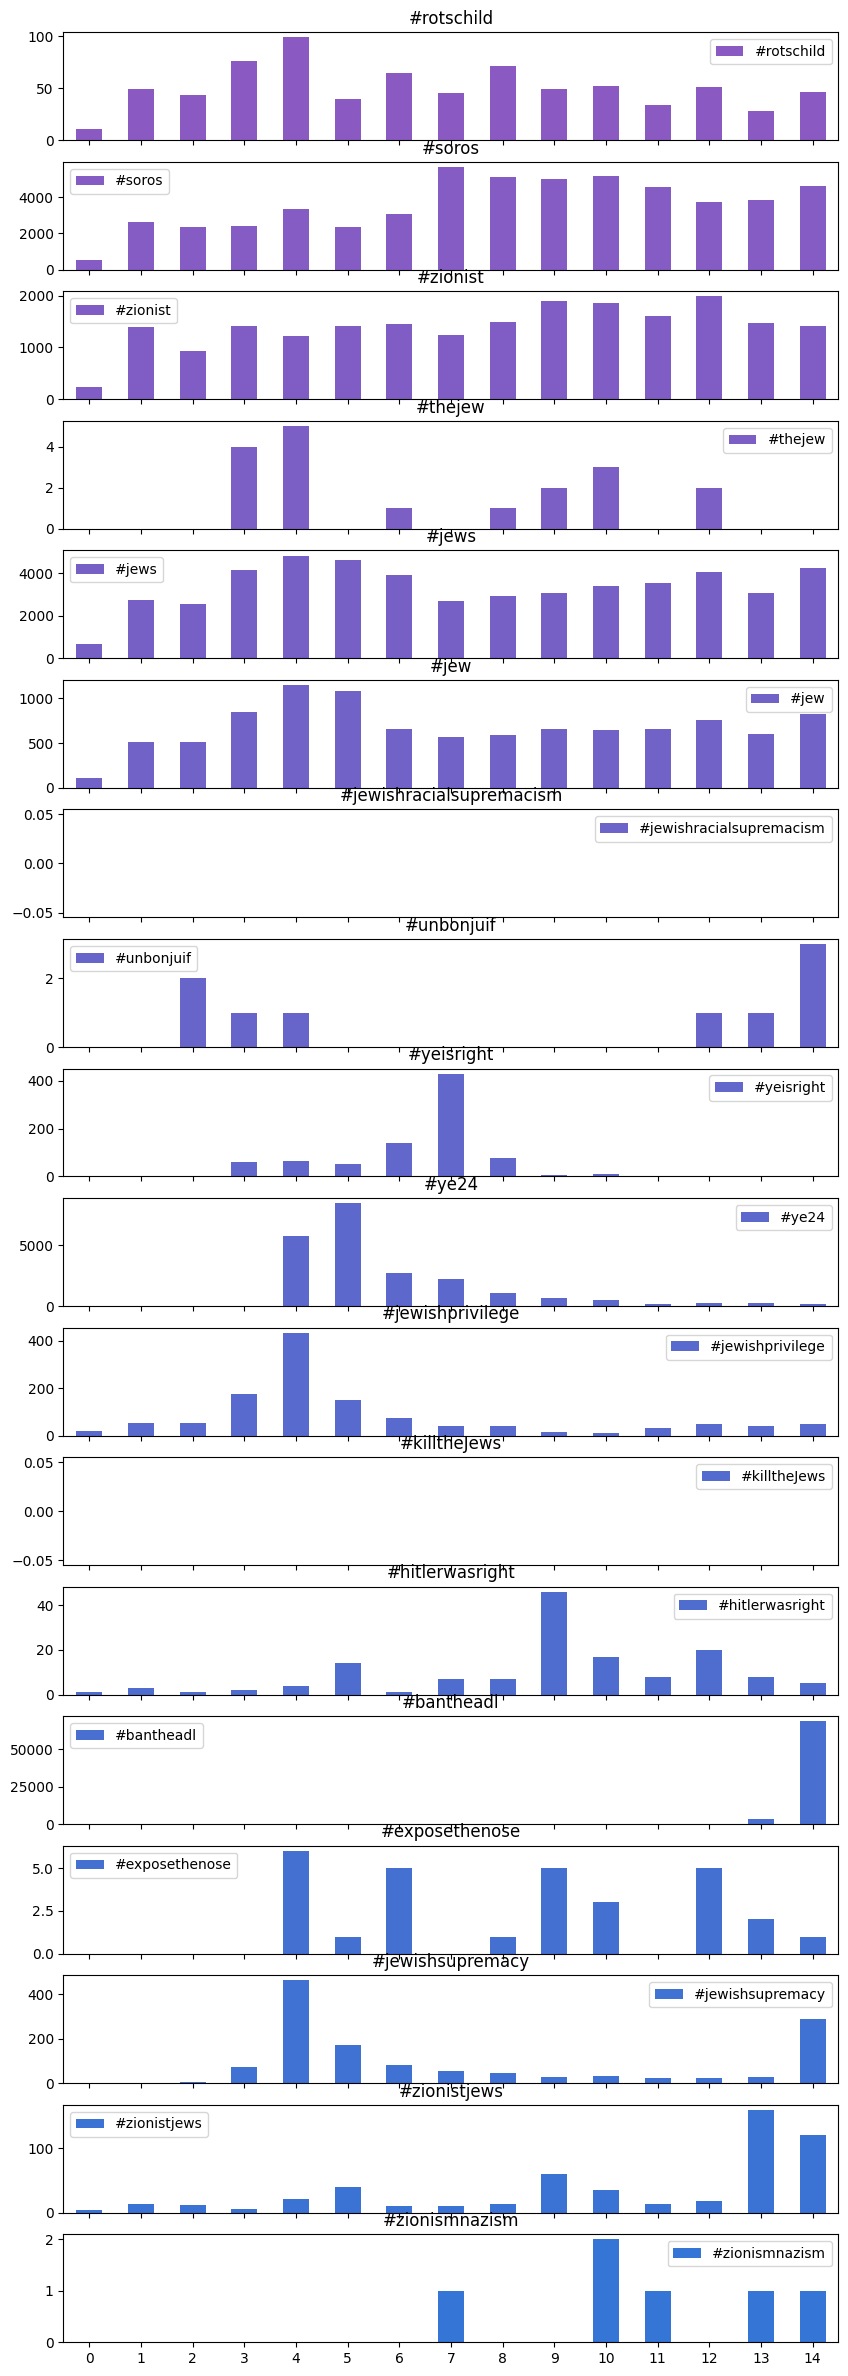

In [ ]:
# Per hashtag per month
axes = df_hash_monthly.plot.bar(rot=0, subplots=True, figsize=(10,30), color=get_color_gradient(color1, color2, 18))
axes[1].legend(loc=2)

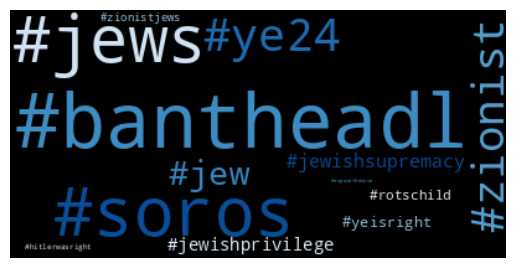

In [ ]:
# Targeted hashtags importance

df = df_hash_monthly.drop(['date'], axis=1)
df = df.sum()
wordcloud = WordCloud(colormap="Blues")
wordcloud.generate_from_frequencies(frequencies=df)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

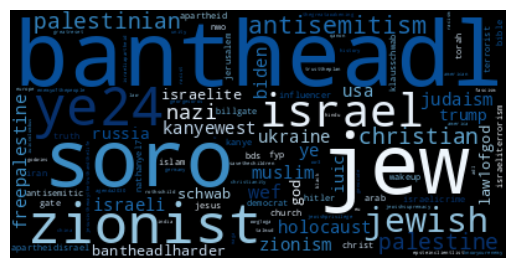

In [ ]:
# All hashtags importance
big_text = ''
#clean
df = dataset[~dataset.hashtags.isna()]
all_hash = list(df.hashtags)
for text in all_hash:
  big_text += ' ' + text.replace("['",'').replace("']",'').replace(", '",'').replace("'",' ')
# Display
wordcloud = WordCloud(max_font_size=100, max_words=100, colormap="Blues", collocations=False).generate(big_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## User

<ipython-input-3-ce60cbe979f5>:104: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_user_sec = df.groupby('local_time', as_index=False).sum() #sum the number of tweets by merging by users
<ipython-input-3-ce60cbe979f5>:109: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_user_monthly = df_user_monthly.groupby('date', as_index=False).sum()


Text(0.5, 1.0, 'Activity of the top 10 most active users')

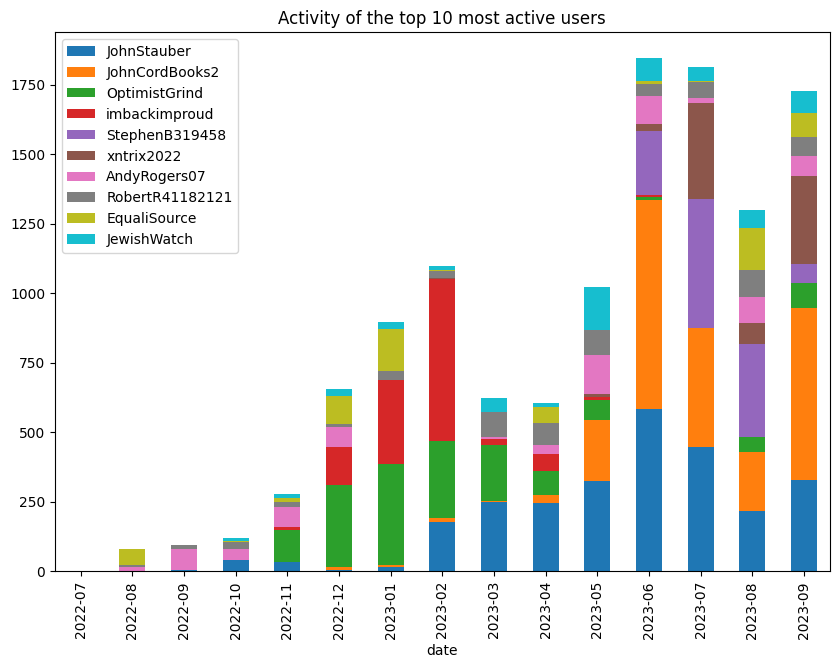

In [ ]:
# Number of tweets by month by the most active user on the entire period
top = 10 #choose the number of most active users

df_user_monthly = active_user_monthly(dataset, top)
df = df_user_monthly.set_index('date')
ax = df.plot.bar(stacked=True, figsize=(10,7))
plt.title(f"Activity of the top {top} most active users")

-------- BASIC INFORMATIONS ------------
==> Name: JohnStauber, aka OneGovtUnderZionism👎🇺🇸🇮🇱
==> Description: Books: #ToxicSludgeIsGoodForYou #TrustUsWeAreExperts #WeaponsOfMassDeception #TheBestWarEver. Exposing corp/govt #propaganda, #AntiWar. (#Deamplified by @X👎)
==> Location: The Hanoi Hilton

==> Number of followers: 1592
==> Number of following: 1046
----------------------------------------


<ipython-input-3-ce60cbe979f5>:125: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_user_sec = df.groupby('local_time', as_index=False).sum()
<ipython-input-3-ce60cbe979f5>:130: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_user_daily =  df_user_daily.groupby('date', as_index=False).sum()
<ipython-input-3-ce60cbe979f5>:135: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_user_monthly = df_user_monthly.groupby('date'

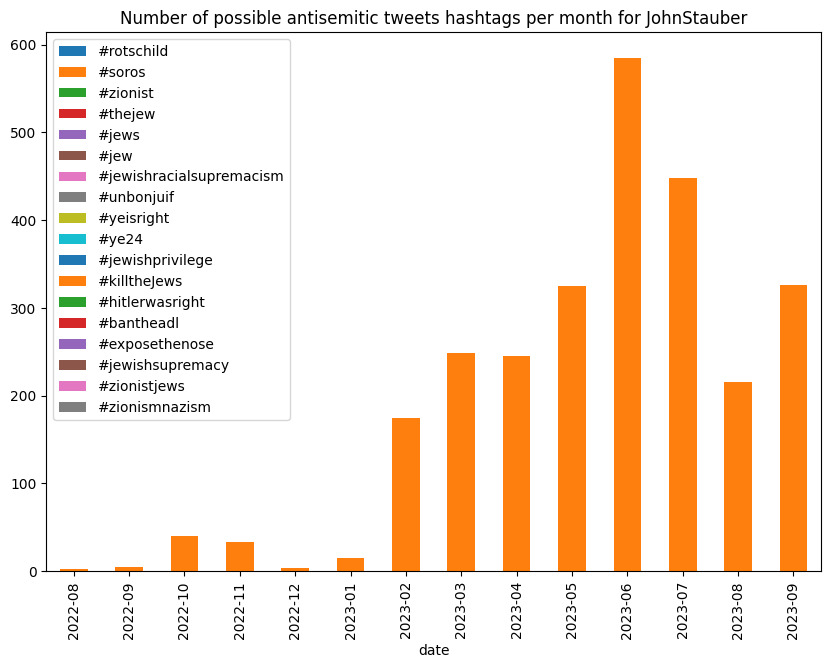

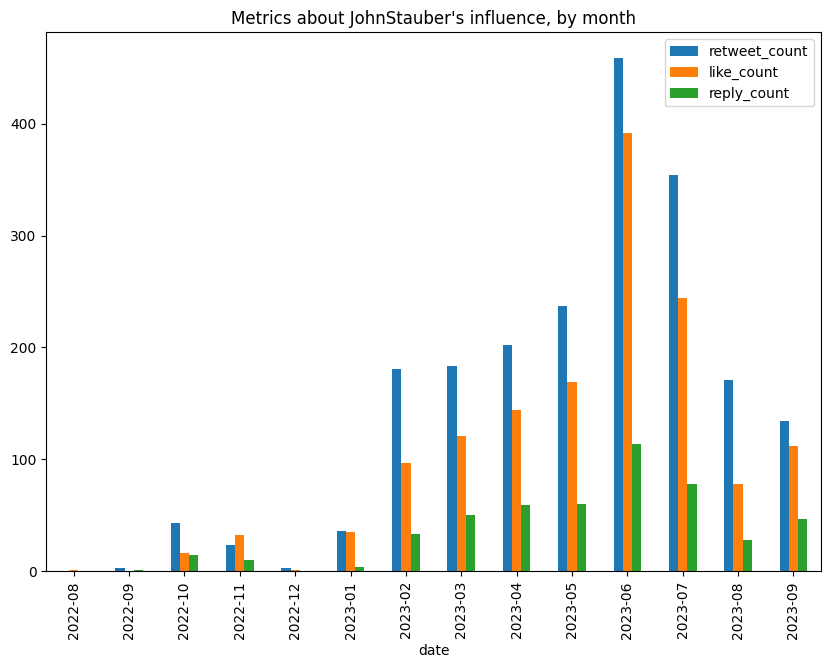

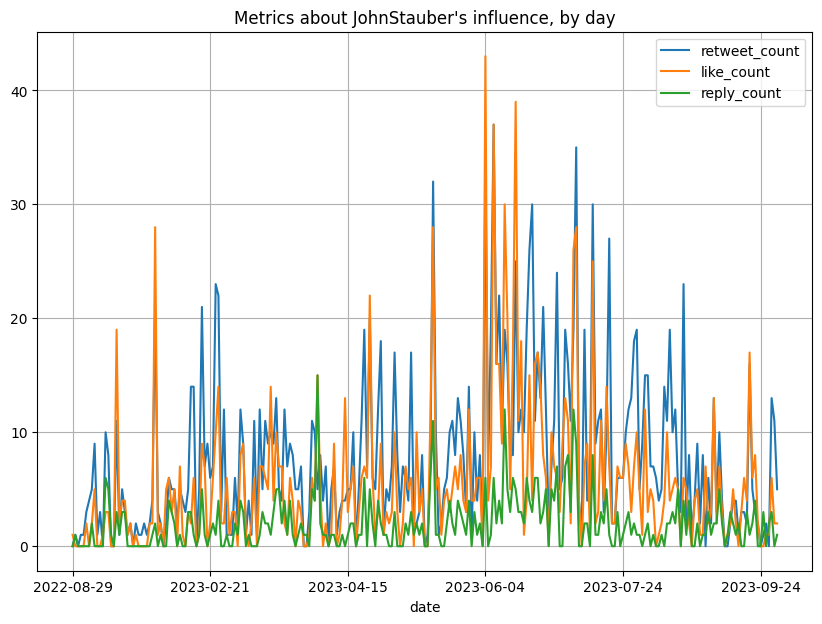

In [ ]:
# Stats on specific users
top_10_users = ['JohnStauber', 'JohnCordBooks2', 'OptimistGrind',
       'imbackimproud', 'StephenB319458', 'xntrix2022', 'ScottElkins1919',
       'Justis4u3', 'RobertR41182121', 'AndyRogers07']
name = 'JohnStauber'

interest_col = ['local_time','url', 'timestamp_utc',
       'quoted_user', 'quoted_user_id', 'domains', 'hashtags', 'mentioned_ids',
       'mentioned_names', 'to_tweetid', 'to_username', 'to_userid', 'lang',
       'possibly_sensitive', 'retweet_count', 'like_count', 'reply_count',
       'user_screen_name', 'user_name', 'user_friends', 'user_followers',
       'user_location', 'user_verified', 'user_description', 'user_created_at',
       'user_id']

df_user = dataset[dataset['user_screen_name'] == name][interest_col]

basic_info(df_user, hashtag_list)

In [ ]:
# Users with that increase the most their influence

df = dataset[['user_screen_name', 'user_followers']].copy()
df2 = df.groupby('user_screen_name', as_index=False).min()
df2['max_followers'] = df.groupby('user_screen_name', as_index=False).max()['user_followers']
df2['variation_nb'] = df2['max_followers'] - df2['user_followers']
df2['variation_relative'] = round((df2['max_followers'] - df2['user_followers'])/(df2['max_followers'] + df2['user_followers'])*100,2)
df2 = df2.sort_values(by=['variation_nb'], ascending=[False])

df2.head(10)

user_screen_name  user_followers  max_followers  variation_nb  \
27616  RantandRave1776          6158.0        15584.0        9426.0   
17052    JimFergusonUK        135691.0       142353.0        6662.0   
23455       Muslimseye         23581.0        29746.0        6165.0   
25293         Ostrov_A        243180.0       248868.0        5688.0   
35724   WallStreetApes        200285.0       204720.0        4435.0   
15729    IsraelWarRoom        268746.0       272900.0        4154.0   
52724      polimernews       1910845.0      1914385.0        3540.0   
31471      StandWithUs        300298.0       303506.0        3208.0   
29597  SamParkerSenate         74659.0        77745.0        3086.0   
16890   Jerusalem_Post        733382.0       736364.0        2982.0   

       variation_relative  
27616               43.35  
17052                2.40  
23455               11.56  
25293                1.16  
35724                1.10  
15729                0.77  
52724                0.09  
31471                0.53  
29597                2.02  
16890                0.20

-------- BASIC INFORMATIONS ------------
==> Name: Muslimseye, aka M o O n Y
==> Description: اَللّٰهُمَّ فَقِّهْنِا فِى الدِّيْنِ
==> Location: nan

==> Number of followers: 29746
==> Number of following: 126
----------------------------------------


<ipython-input-3-ce60cbe979f5>:125: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_user_sec = df.groupby('local_time', as_index=False).sum()
<ipython-input-3-ce60cbe979f5>:130: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_user_daily =  df_user_daily.groupby('date', as_index=False).sum()
<ipython-input-3-ce60cbe979f5>:135: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_user_monthly = df_user_monthly.groupby('date'

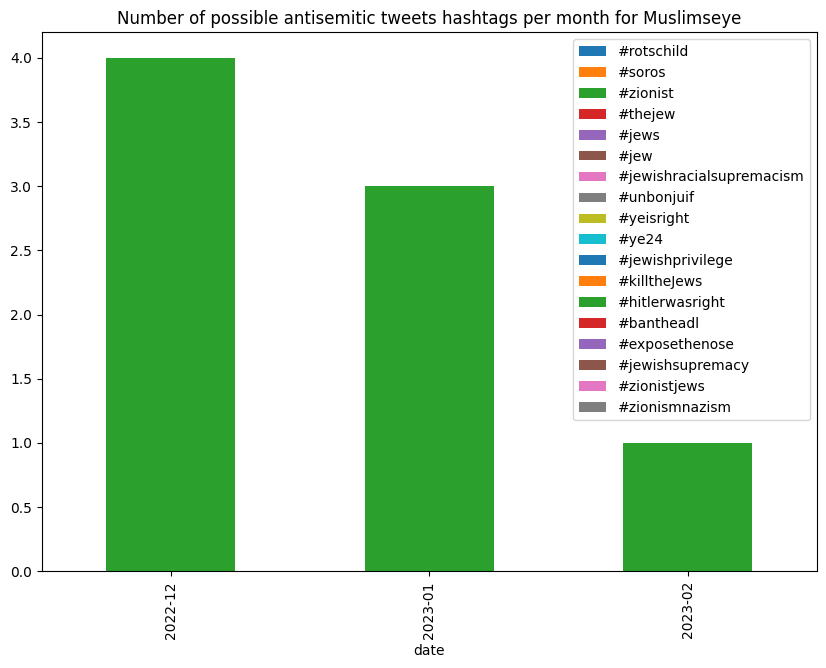

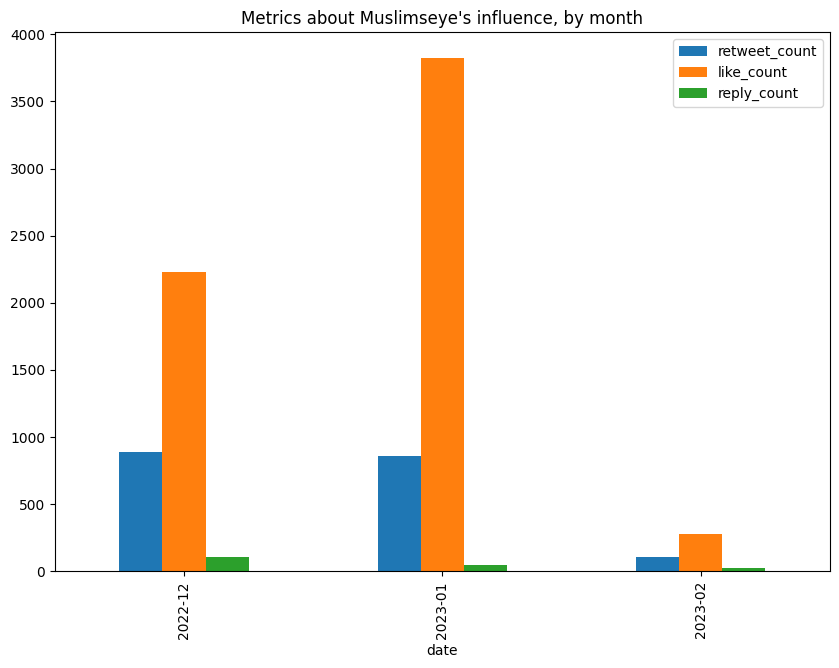

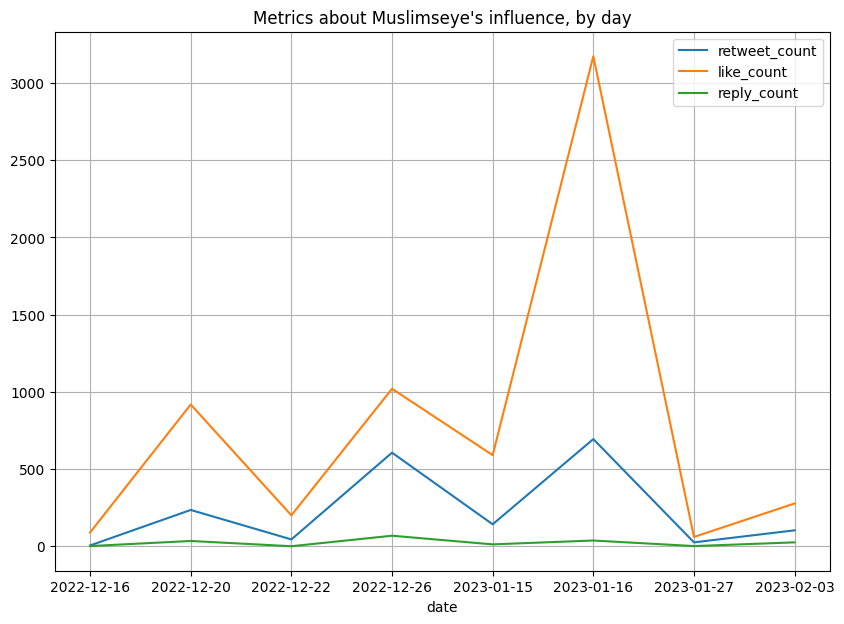

In [ ]:
name = 'Muslimseye'

interest_col = ['local_time','url', 'timestamp_utc',
       'quoted_user', 'quoted_user_id', 'domains', 'hashtags', 'mentioned_ids',
       'mentioned_names', 'to_tweetid', 'to_username', 'to_userid', 'lang',
       'possibly_sensitive', 'retweet_count', 'like_count', 'reply_count',
       'user_screen_name', 'user_name', 'user_friends', 'user_followers',
       'user_location', 'user_verified', 'user_description', 'user_created_at',
       'user_id']

df_user = dataset[dataset['user_screen_name'] == name][interest_col]

basic_info(df_user, hashtag_list)

## Words

In [ ]:
!pip install contractions

In [ ]:
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams

import re, string, unicodedata
import nltk
import contractions
import inflect

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop = {
    'en': stopwords.words('english'),
    'fr': stopwords.words('french')
}
#https://www.kaggle.com/code/vpkprasanna/basic-text-cleaning-wordcloud-and-n-gram-analysis

In [ ]:
def tokenizeandstopwords(text):

  # strip links
  link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
  links = re.findall(link_regex, text)
  for link in links:
    text = text.replace(link[0], ', ')

  text = text.lower()
  tokens = nltk.word_tokenize(text)
  token_words = [w for w in tokens if w.isalpha()] # taken only words (not punctuation)
  meaningful_words = [w for w in token_words if not w in stop['fr']]
  joined_words = ( " ".join(meaningful_words))
  return joined_words

In [ ]:
#problème des langues autre qu'anglais
test_tok = dataset[dataset['lang'] == 'fr']['text']
test_tok = test_tok.apply(tokenizeandstopwords)

In [ ]:
dataset.groupby('lang', as_index=False).count()

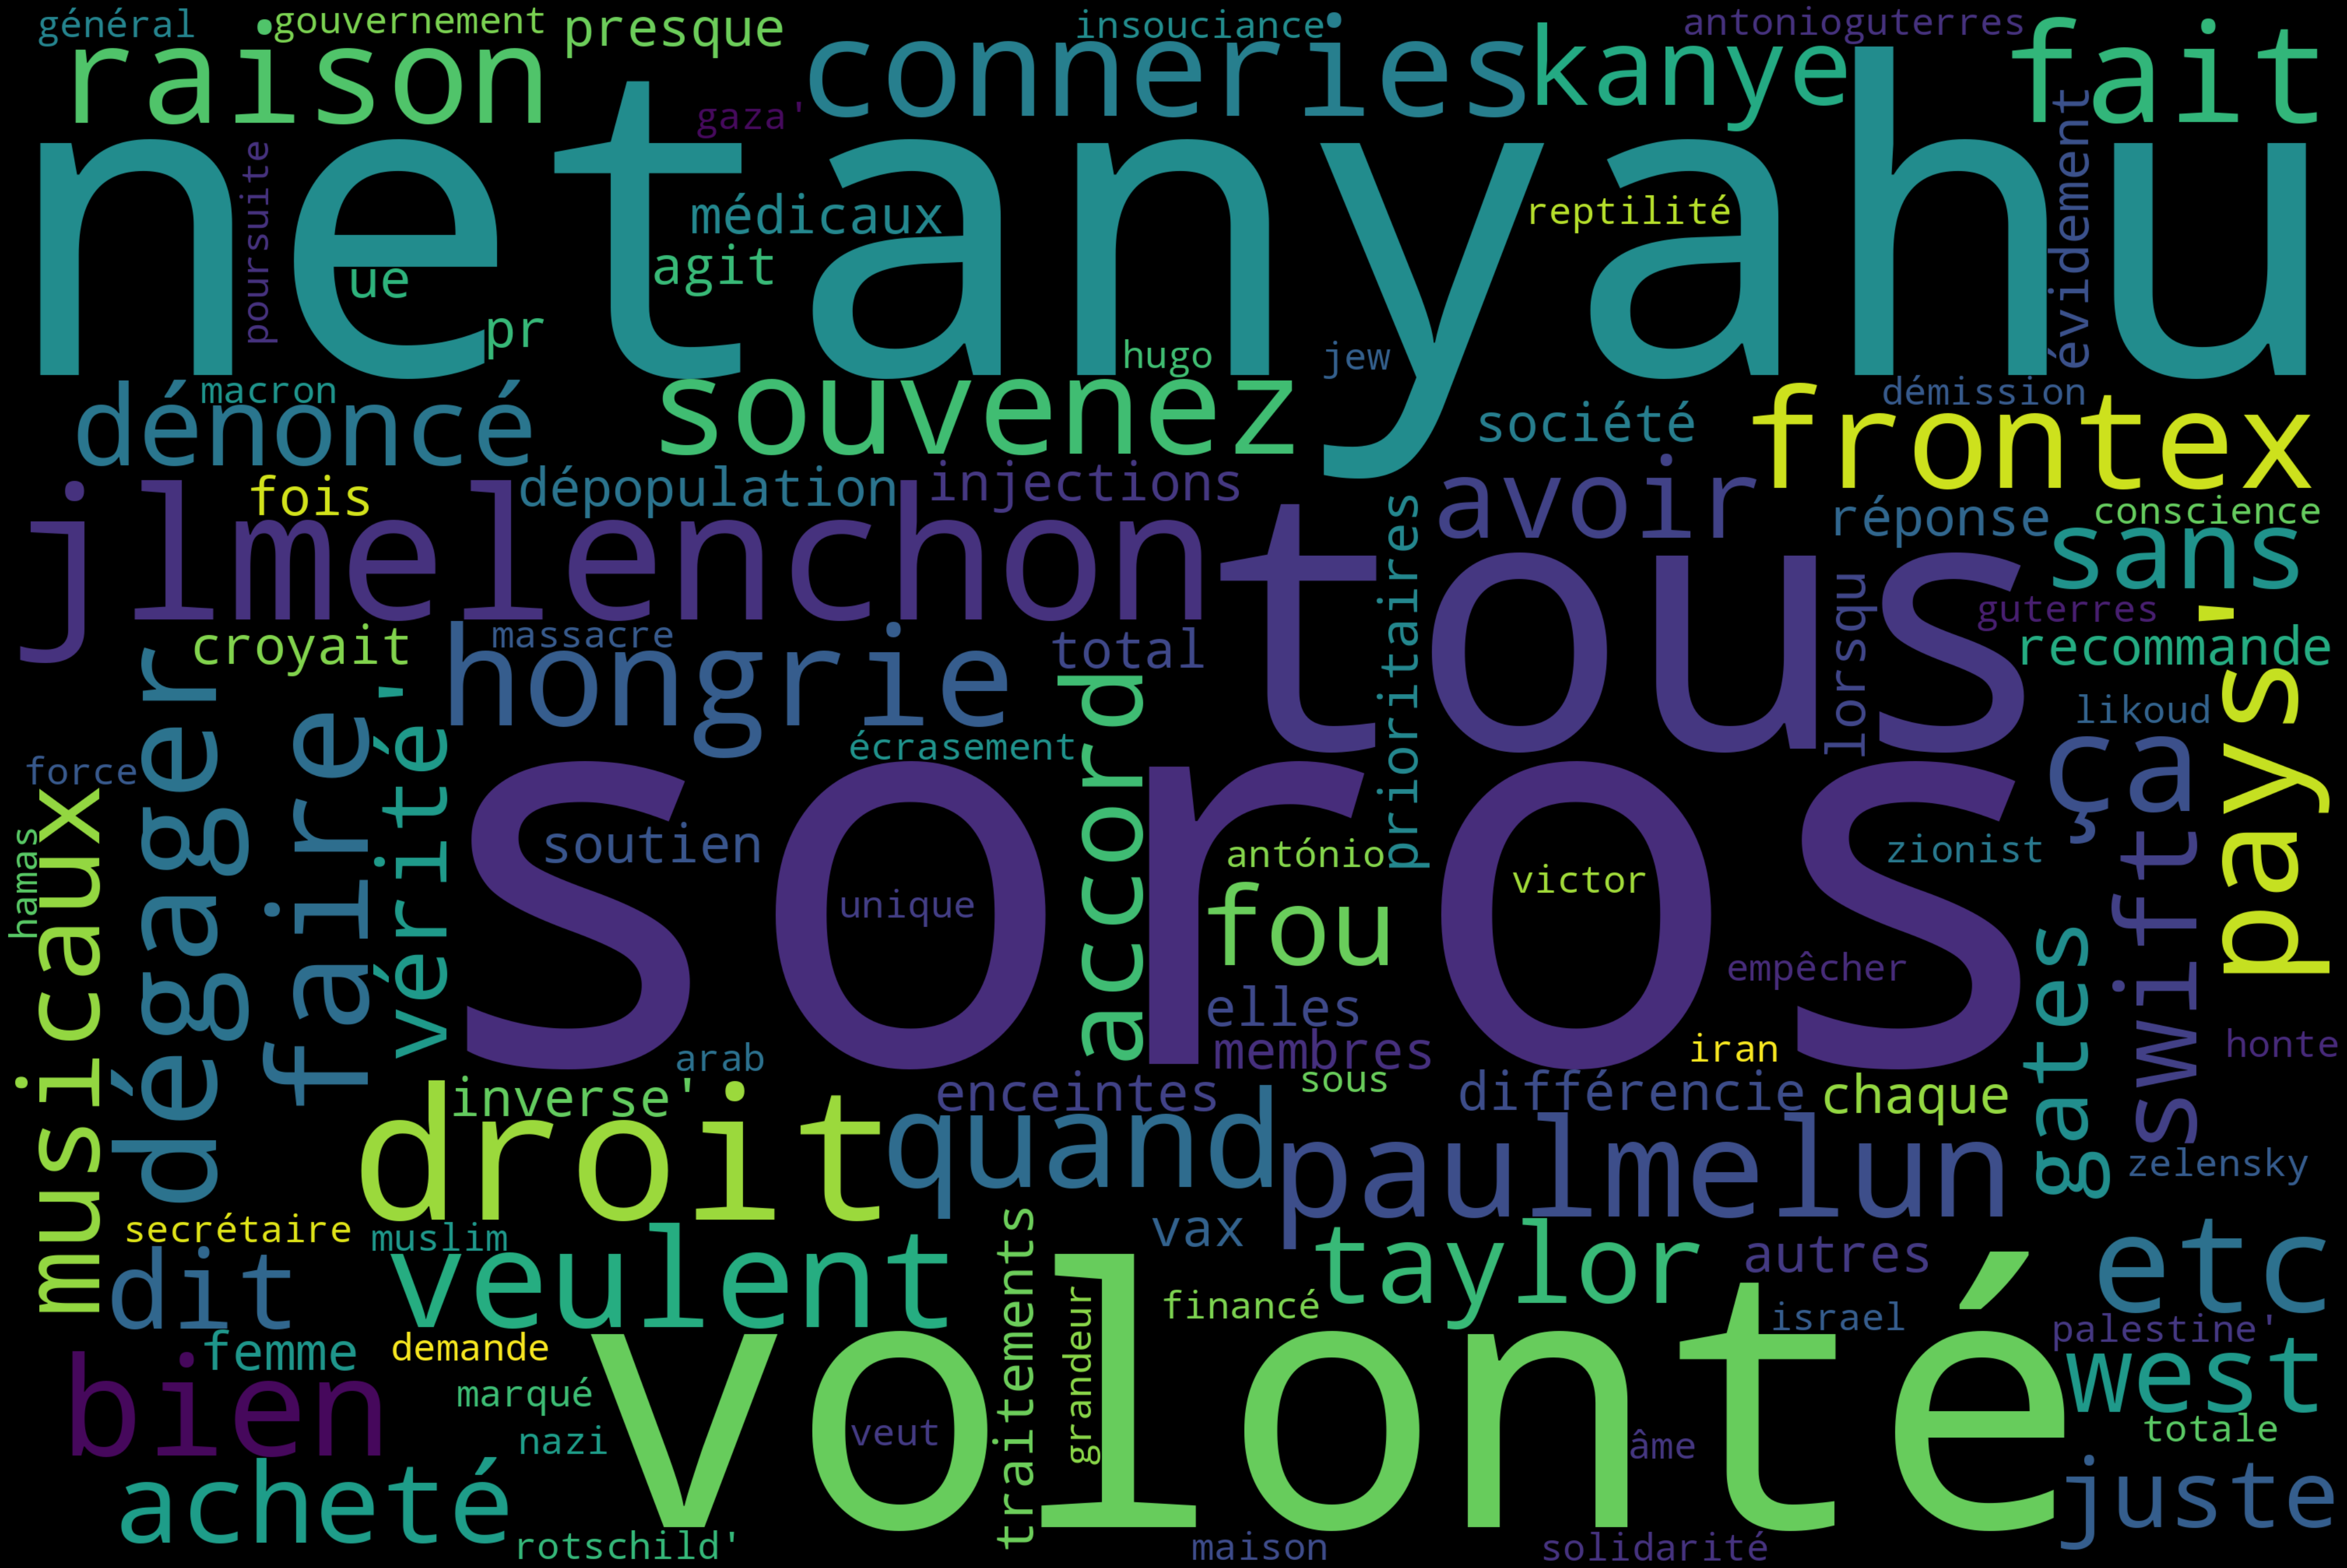

In [ ]:
generate_word_cloud(test_tok.values)

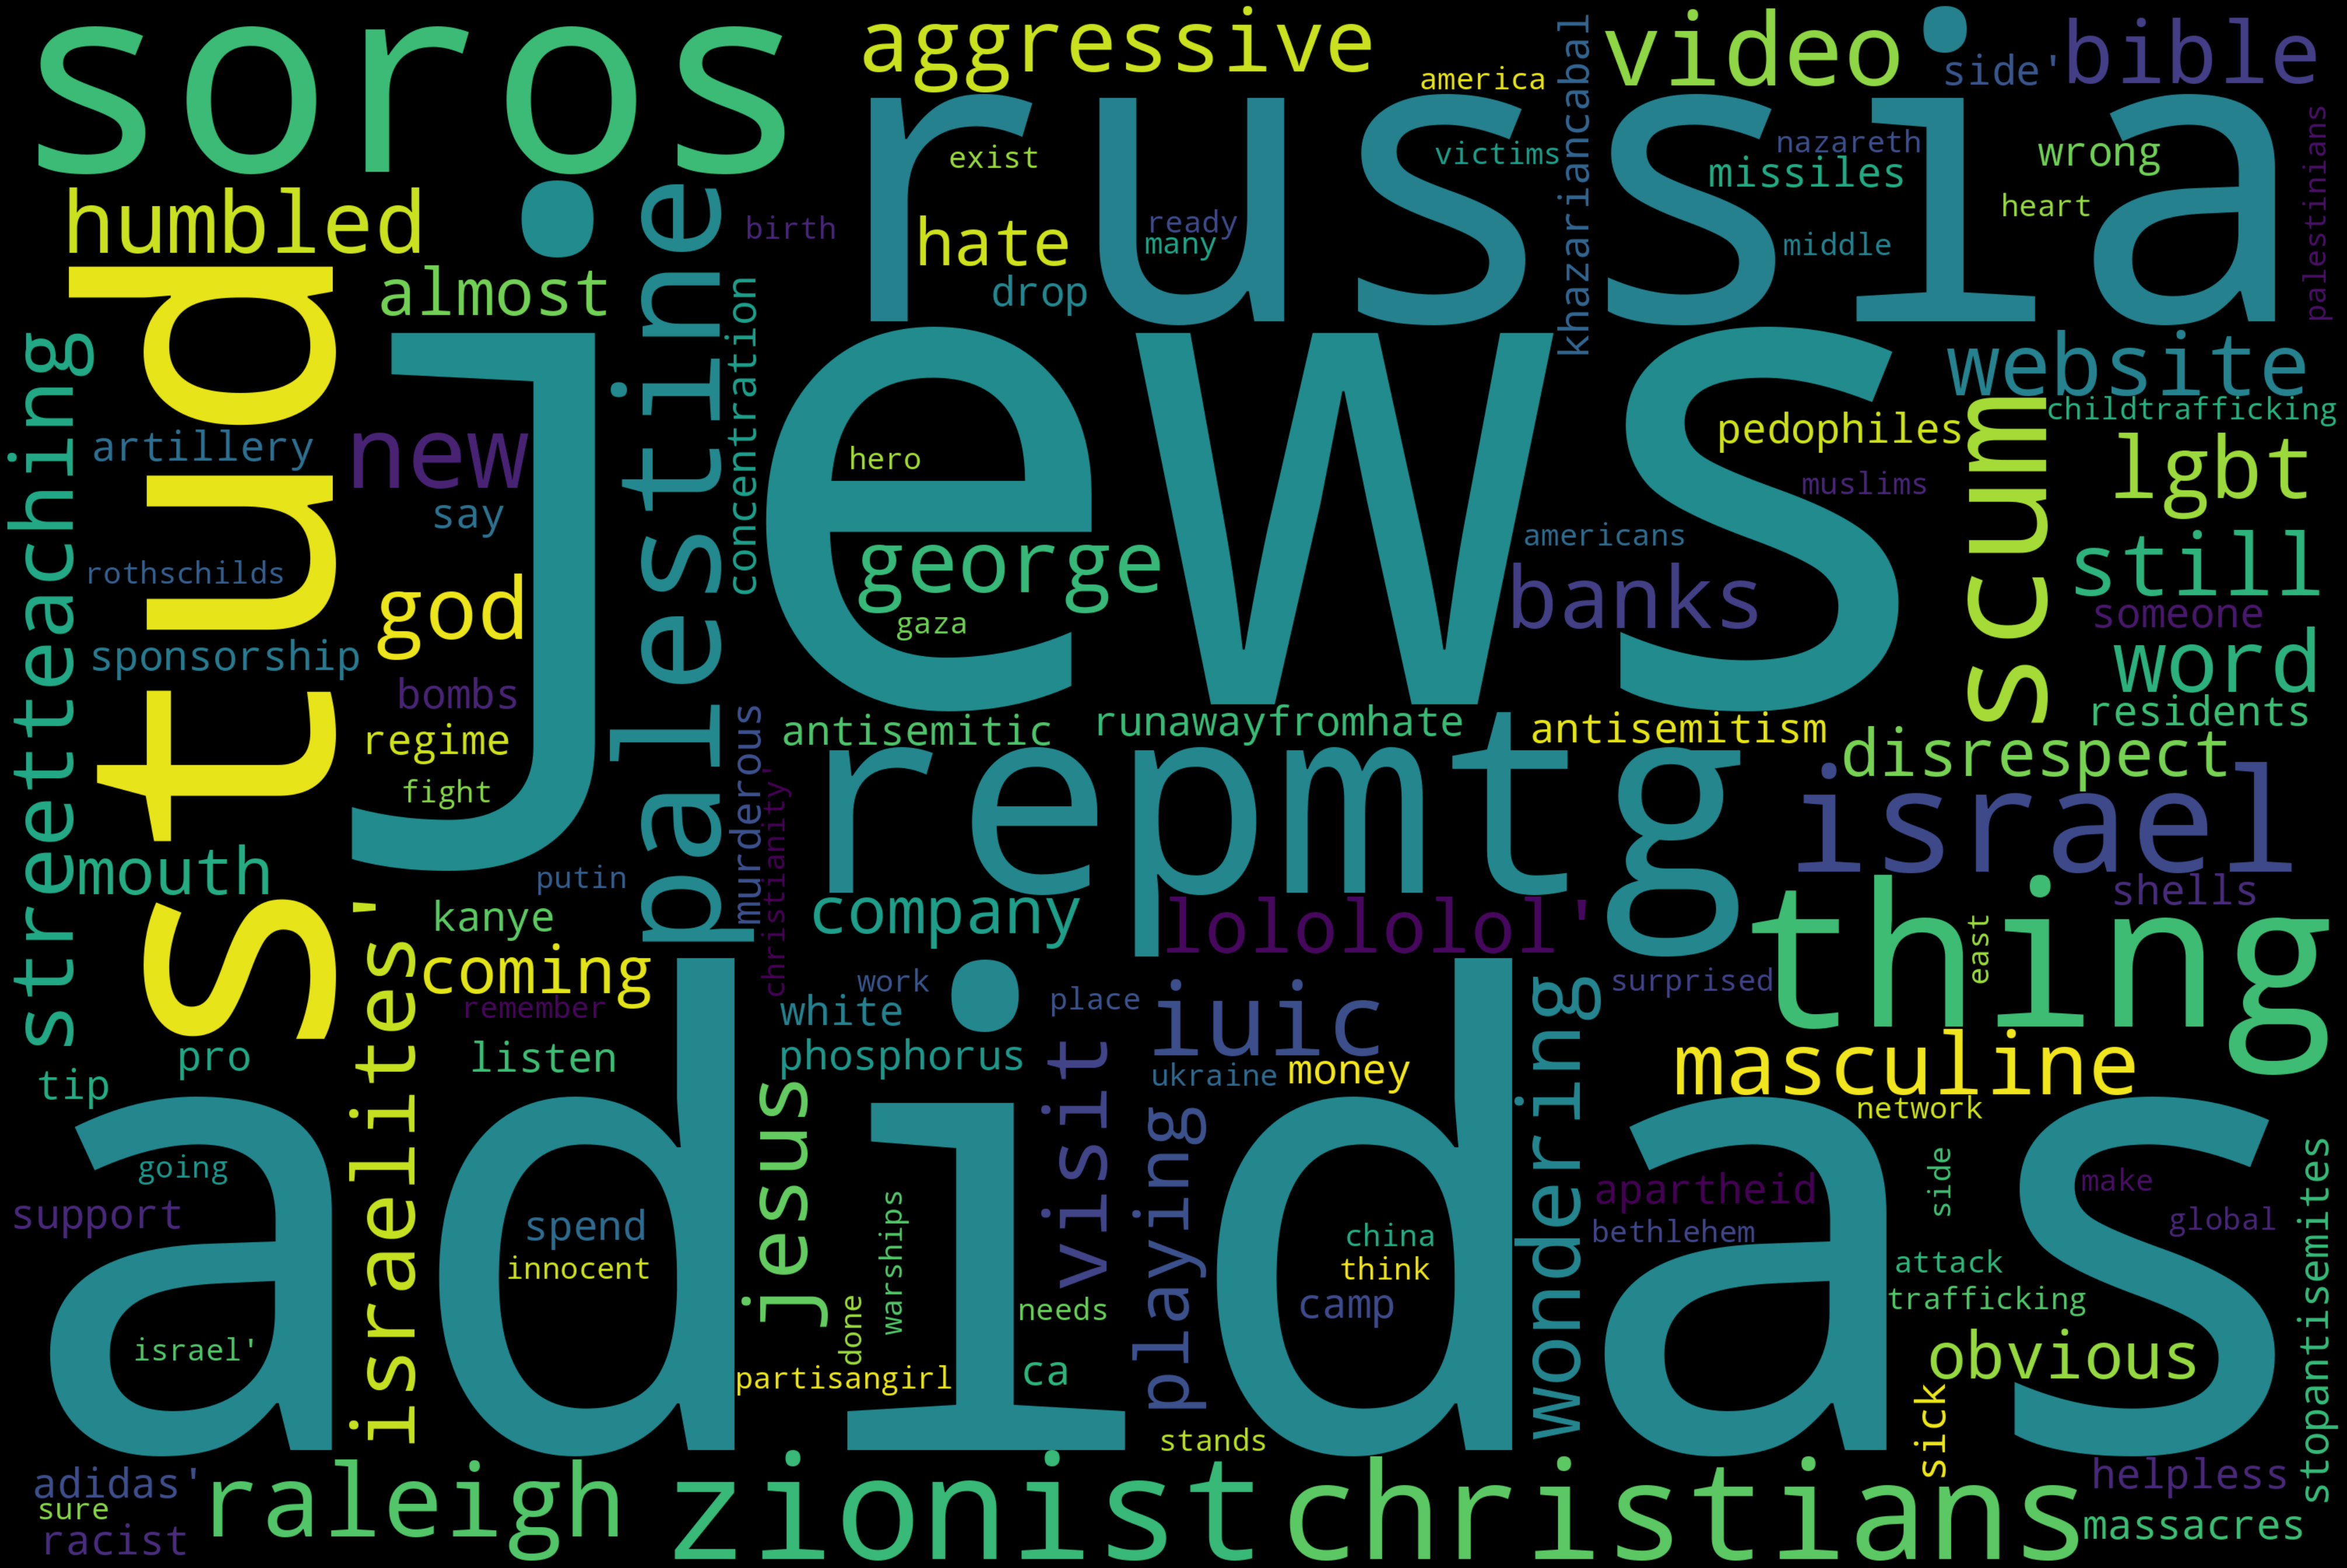

In [ ]:
generate_word_cloud(test_tok.values)

# Before and after Musk

In [ ]:
path1 = '//content/drive/Shareddrives/Group 3 - Sociology of Digital Public Spaces /Data/FINAL_tweet.csv'
dataset = pd.read_csv(path1)
df_before = dataset[dataset.timestamp_utc < 1666828800] #corresponding to the '2022-10-27'
df_after = dataset[dataset.timestamp_utc >= 1666828800]

<ipython-input-248-dc71b7b91125>:2: DtypeWarning: Columns (18,24,26,40) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(path1)


## Overview

In [ ]:
%%capture
hashtag_list = ['#rotschild','#soros','#zionist','#thejew','#jews','#jew','#jewishracialsupremacism',
                '#unbonjuif','#yeisright','#ye24','#jewishprivilege','#killtheJews','#hitlerwasright',
                '#bantheadl','#exposethenose','#jewishsupremacy','#zionistjews','#zionismnazism'
]

df_hash_sec, df_hash_daily, df_hash_monthly =  boxplot_hash(
    targeted_hashtags=hashtag_list,
    df=dataset
)

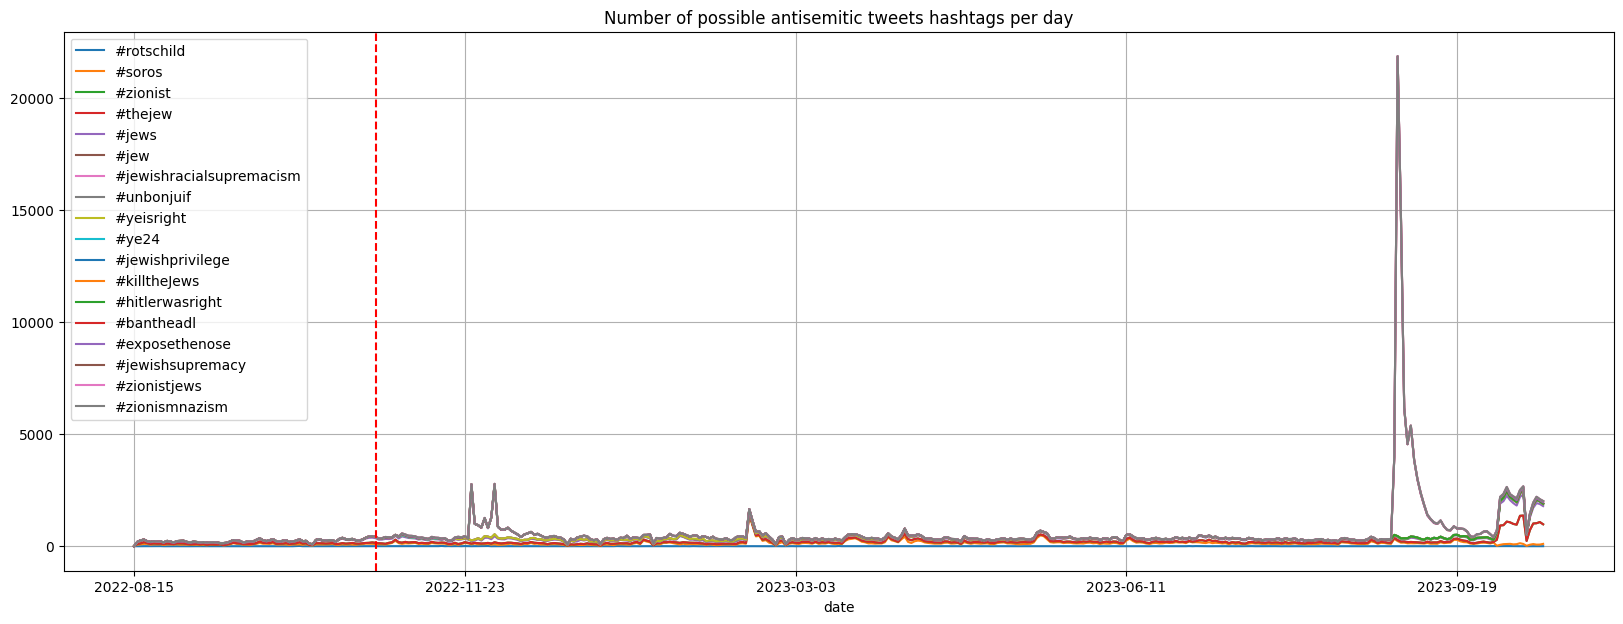

In [ ]:
df = df_hash_daily.set_index('date')
ax = df.plot(stacked=True, figsize=(20,7))
position = list(df.index).index('2022-10-27')
ax.axvline(position, color="red", linestyle="dashed")
plt.title("Number of possible antisemitic tweets hashtags per day")
plt.grid()

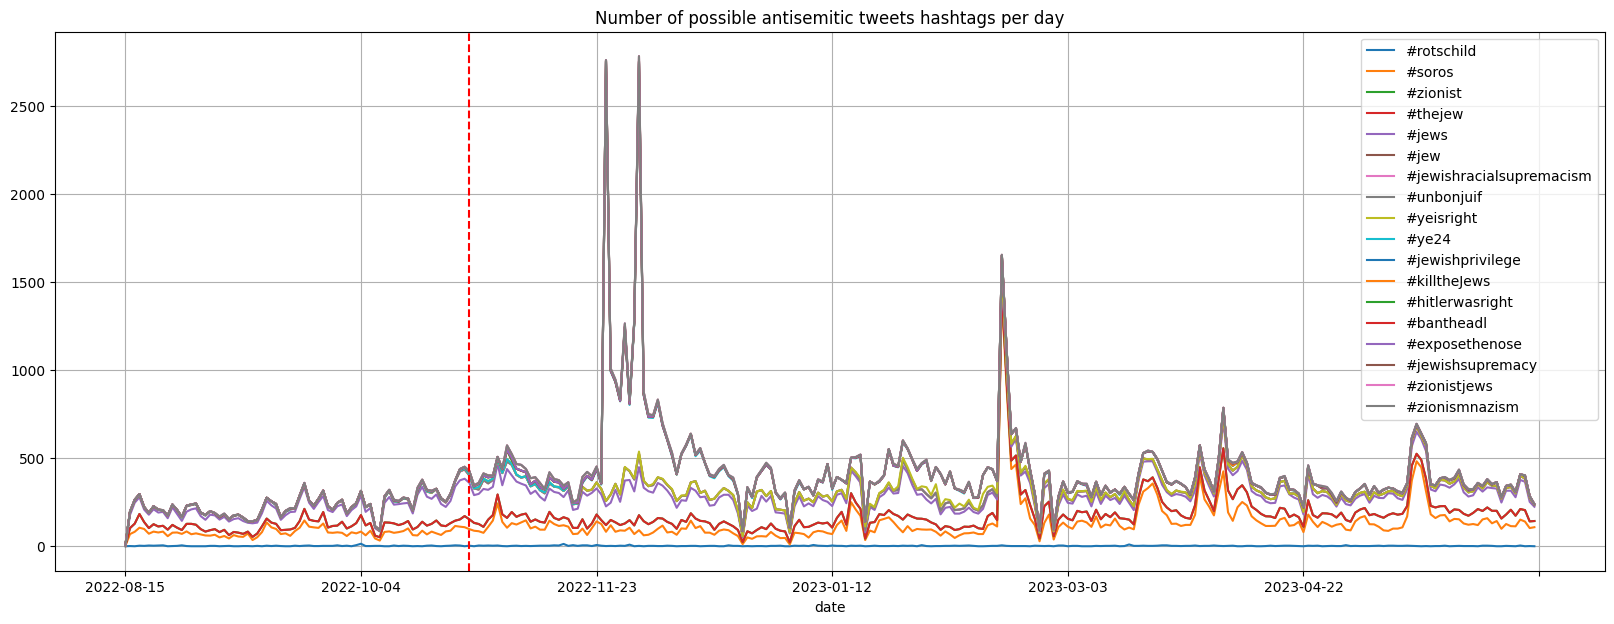

In [ ]:
df = df_hash_daily.set_index('date').head(300)
ax = df.plot(stacked=True, figsize=(20,7))
position = list(df.index).index('2022-10-27')
ax.axvline(position, color="red", linestyle="dashed")
plt.title("Number of possible antisemitic tweets hashtags per day")
plt.grid()